In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('interpolated.csv')
# extract row corresponding to center_camera
df = df.loc[df['frame_id']=='center_camera']
df.angle *= 180 / np.pi 

## Original steering angle distribution

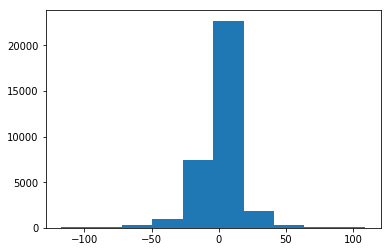

In [50]:
bins_cnt, bins,_ = plt.hist(df.angle, bins=10) 

## Remove bins with too few counts & crop too large bins

In [51]:
bins_list = [(bins[i], bins[i + 1]) for i in range(len(bins) - 1)]
# Calculate keep prob for each bins
keep_prob = []
baseline = 1 * bins_cnt.mean()
print('baseline = ', baseline)
for cnt in bins_cnt:
    if cnt < 0.1 * baseline:
        keep_prob.append(0.)
    elif cnt < baseline:
        keep_prob.append(1.)
    else:
        keep_prob.append(baseline / cnt)
            
print('Keep prob:\n', keep_prob)

# Append 'keep' column to df
df['keep'] = pd.Series(np.array([False for i in range(len(df.index))]), index=df.index)
# Sort df wrt angle
df.sort_values('angle', inplace=True)

baseline =  3380.8
Keep prob:
 [0.0, 0.0, 0.0, 1.0, 0.4530081736567064, 0.1489273600281926, 1.0, 0.0, 0.0, 0.0]


In [52]:
# iterate through every row and decide whether to keep this row according bins' keep_prob
bins_idx = 0  # which bins to start testing if this angle is belong to
for index, row in df.iterrows():
    # Found bins contains this angle
    for _idx in range(bins_idx, len(bins_list)):
        if row['angle'] >= bins_list[_idx][0] and row['angle'] <= bins_list[_idx][1]:
            # Decide whether to keep this angle
            if np.random.rand() < keep_prob[_idx]:
                df.at[index, 'keep'] = True
            # update bins_idx
            if _idx != bins_idx:
                bins_idx = _idx
            break

## New steering angle distribution

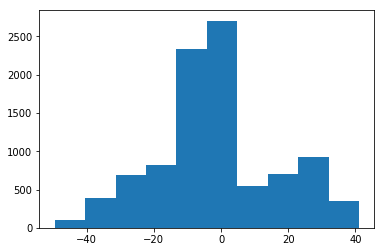

In [53]:
n, bins, _ = plt.hist(df.loc[df.keep].angle, bins=10)

In [54]:
df.loc[df.keep].to_csv('ch2_train_center_cam.csv')

### Test written data

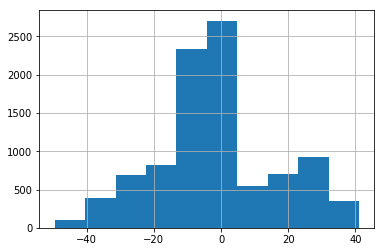

In [55]:
test_df = pd.read_csv('ch2_train_center_cam.csv')
test_df.angle.hist()